In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = 'data/loan-prediction.csv'

In [3]:
df = pd.read_csv(DATA_FILE)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

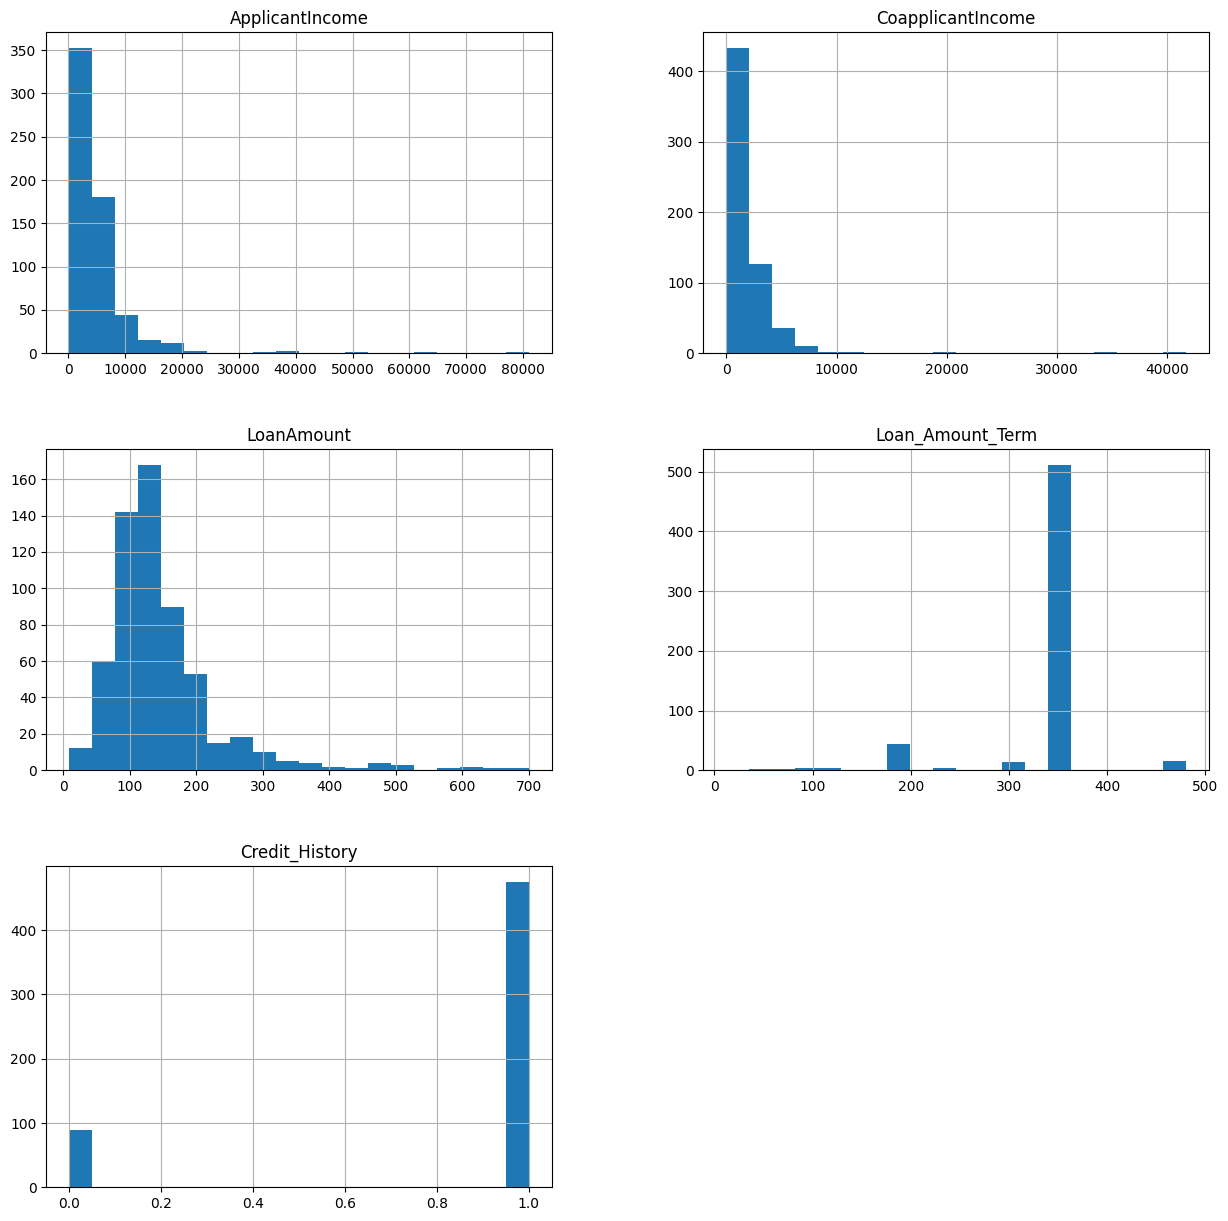

In [6]:
df.hist(figsize=(15,15), bins=20)
plt.show()

<AxesSubplot: >

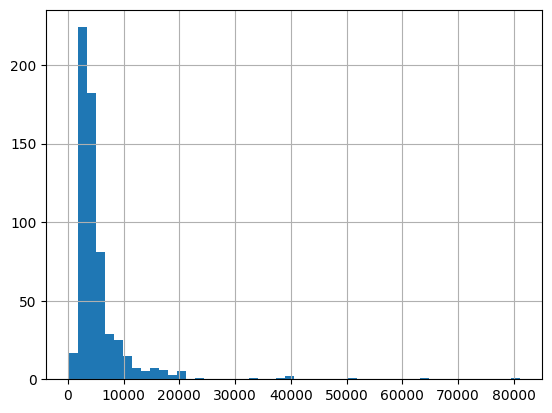

In [7]:
df['ApplicantIncome'].hist(bins=50)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.drop(columns=['Loan_ID'], inplace=True)

Data imputation: fill in missing value of categorical data with mode and numerical data with mean values.

In [10]:
for column in df.columns:
    if df[column].dtypes == 'object' or column in ['Credit_History', 'Loan_Amount_Term']:
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mode()[0], inplace=True)
            print(column, df[column].mode()[0])

Gender Male
Married Yes
Dependents 0
Self_Employed No
Loan_Amount_Term 360.0
Credit_History 1.0


In [11]:
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mean(), inplace=True)
            print(column, df[column].mean())

LoanAmount 146.41216216216216


In [12]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [13]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler

X = pd.get_dummies(X)
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [15]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
from sklearn.svm import SVC

SVCclassifier = SVC(kernel='rbf')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)


from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

SVC accuracy: 75.81%


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LRclassifier = LogisticRegression(max_iter=500, random_state=42)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           N       0.88      0.33      0.48        21
           Y       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62

[[ 7 14]
 [ 1 40]]
LR accuracy: 75.81%


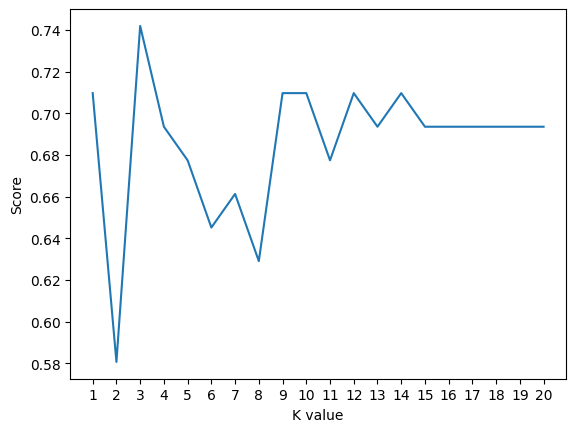

KNN best accuracy: 74.19%


In [19]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

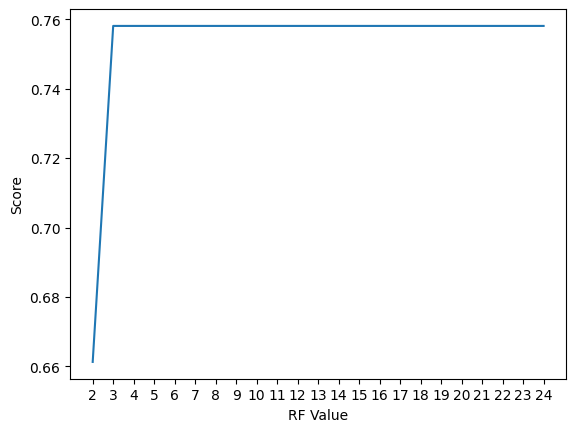

Random Forest Accuracy:  75.81%


In [20]:
from sklearn.ensemble import RandomForestClassifier

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

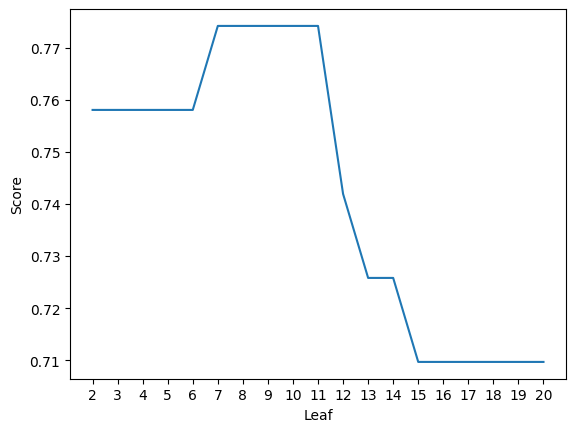

Decision Tree Accuracy: 77.42%


In [21]:
from sklearn.tree import DecisionTreeClassifier

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [24]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)

DTclassifier.fit(X_train, y_train)
print(f"Train acc: {(DTclassifier.score(X_train, y_train) * 100):.2f}%")
print(f"Test acc: {(DTclassifier.score(X_test, y_test) * 100):.2f}%")

Train acc: 83.15%
Test acc: 77.42%


In [29]:
import joblib 

joblib.dump(mms, 'artifacts/loan_scaler.pkl')
joblib.dump(DTclassifier, 'artifacts/loan_model.pkl')

['artifacts/loan_model.pkl']